## LIBRARIES


In [513]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [514]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

# Importing Dataset

In [515]:
dataset = pd.read_csv('heart.csv')
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [516]:
print("Dataset Shape:", dataset.shape)
dataset.head()

Dataset Shape: (918, 12)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# Data Preprocessing

In [517]:
from sklearn.preprocessing import LabelEncoder
le1 = LabelEncoder() 
le2 = LabelEncoder() 
le6 = LabelEncoder() 
le8 = LabelEncoder() 
le10 = LabelEncoder() 
x[:,1] = le1.fit_transform(x[:,1])
x[:,2] = le2.fit_transform(x[:,2])
x[:,6] = le6.fit_transform(x[:,6])
x[:,8] = le8.fit_transform(x[:,8])
x[:,10] = le10.fit_transform(x[:,10])

In [518]:
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)



Training set size: (734, 11)
Testing set size: (184, 11)


### Splitting Dataset into Training set and Test set

In [519]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2,random_state=0)

# Feature Scaling

In [520]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [521]:
print(X_test)


[[ 0.20230716  0.51017053 -0.77912558 ... -0.78360391 -0.66533939
  -0.60665455]
 [ 1.32722389  0.51017053 -0.77912558 ... -0.78360391 -0.40168731
  -0.60665455]
 [-0.20675347  0.51017053 -0.77912558 ... -0.78360391 -0.75322342
  -0.60665455]
 ...
 [-0.10448831  0.51017053 -0.77912558 ... -0.78360391 -0.75322342
   1.0846248 ]
 [-1.63846567  0.51017053  0.24486804 ... -0.78360391 -0.75322342
   1.0846248 ]
 [-0.00222316  0.51017053  1.26886166 ...  1.27615494 -0.75322342
  -0.60665455]]


# Training Dataset

In [522]:
model_randomforest = RandomForestClassifier()
model_randomforest.fit(X_train, Y_train)



RandomForestClassifier()

In [523]:
model_logistic = LogisticRegression(max_iter=1000)
model_logistic.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

In [524]:
model_kneighbors = KNeighborsClassifier()
model_kneighbors.fit(X_train, Y_train)

KNeighborsClassifier()

In [525]:
model_decision = DecisionTreeClassifier()
model_decision.fit(X_train, Y_train)

DecisionTreeClassifier()

In [526]:
model_svm = SVC()
model_svm.fit(X_train, Y_train)

SVC()

###  Model Evaluation


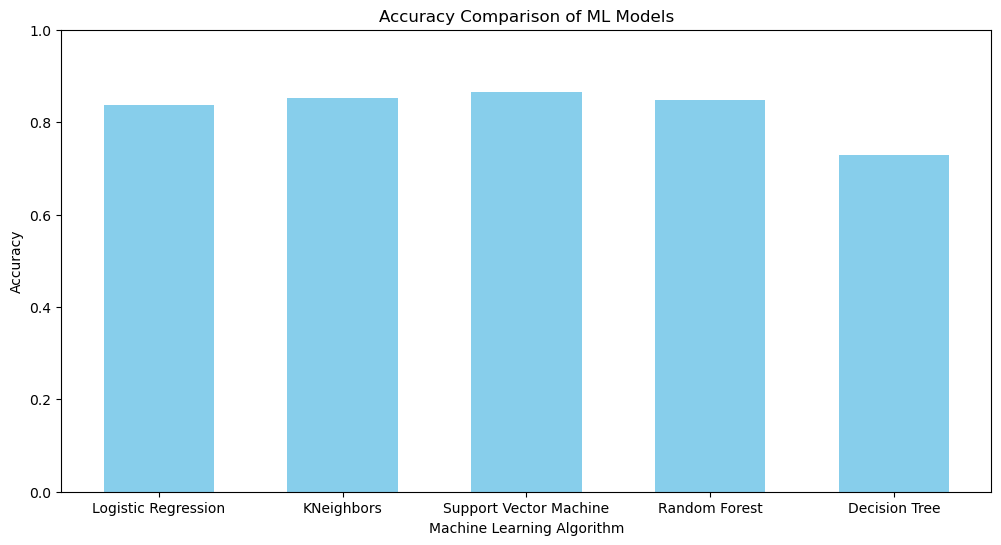

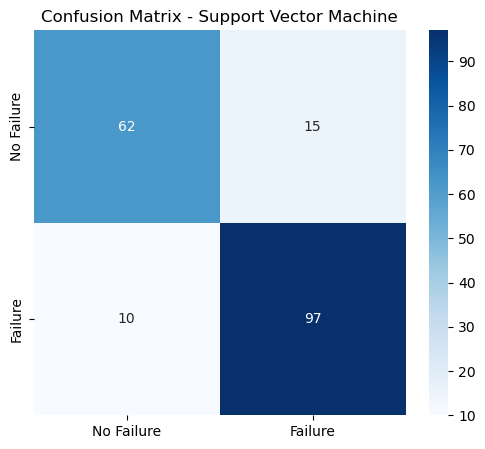

Best Model: Support Vector Machine with Accuracy: 0.86
Random Forest Accuracy: 0.8478260869565217


In [527]:
from sklearn.metrics import confusion_matrix , accuracy_score
y_pred_logistic = model_logistic.predict(X_test)
y_pred_neighbors = model_kneighbors.predict(X_test)
y_pred_svm = model_svm.predict(X_test)
y_pred_decision = model_decision.predict(X_test)
y_pred_random = model_randomforest.predict(X_test)

RandomForest_Accuracy = accuracy_score(Y_test, model_randomforest.predict(X_test))
LogisticRegression_Accuracy = accuracy_score(Y_test, model_logistic.predict(X_test))
KNeighbors_Accuracy = accuracy_score(Y_test, model_kneighbors.predict(X_test))
DecisionTree_Accuracy = accuracy_score(Y_test, model_decision.predict(X_test))
SVM_Accuracy = accuracy_score(Y_test, model_svm.predict(X_test))

accuracy_dict = {
    "Logistic Regression": LogisticRegression_Accuracy,
    "KNeighbors": KNeighbors_Accuracy,
    "Support Vector Machine": SVM_Accuracy,
    "Random Forest": RandomForest_Accuracy,
    "Decision Tree": DecisionTree_Accuracy
}

# Plot accuracies
plt.figure(figsize=(12, 6))
plt.bar(accuracy_dict.keys(), accuracy_dict.values(), width=0.6, color='skyblue')
plt.xlabel("Machine Learning Algorithm")
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison of ML Models")
plt.ylim(0, 1)
plt.show()

best_model_name = max(accuracy_dict, key=accuracy_dict.get)
models = {
    "Logistic Regression": model_logistic,
    "KNeighbors": model_kneighbors,
    "Support Vector Machine": model_svm,
    "Random Forest": model_randomforest,
    "Decision Tree": model_decision
}
best_model = models[best_model_name]

y_pred_best = best_model.predict(X_test)
cm = confusion_matrix(Y_test, y_pred_best)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No Failure", "Failure"],
            yticklabels=["No Failure", "Failure"])
plt.title(f"Confusion Matrix - {best_model_name}")
plt.show()

print(f"Best Model: {best_model_name} with Accuracy: {accuracy_dict[best_model_name]:.2f}")
print("Random Forest Accuracy:", RandomForest_Accuracy)

In [528]:
print(RandomForest_Accuracy)

0.8478260869565217


### Single Prediction

In [529]:
def predict_single(patient_data, model=best_model):
    patient_array = np.array([patient_data], dtype=float)
    patient_array = scaler.transform(patient_array)
    prediction = model.predict(patient_array)[0]
    return "⚠️ Patient at Risk of Heart Failure" if prediction == 1 else "✅ Patient Healthy"



# Example Prediction

sample_patient = [65, 0, 582, 20, 0, 0, 130, 1, 0, 1.3, 111]  

print("Sample Prediction:", predict_single(sample_patient))



Sample Prediction: ⚠️ Patient at Risk of Heart Failure
